# Mindscope_qc demo notebook
# Paired plane registration

This code demonstrates the use of the paired_plane_registration module. Given an ophys_exeriment_id,
 the functions will find the paired experiment_id and load the rigid translations generated by
suite2p. One can then take those translations and load both experiment raw h5 files and apply either
the original or the paired translations. Plotting functions are included to examine the results of these
shifts. Generating chunked movies (every 10mins) and averaging + saving as gifs is helpful to examine
the effects of paired plane signal crosstalk.

Written by: Matt James Davis

Last updated: 01/18/2023

In [ ]:
import brain_observatory_qc.data_access.from_lims as from_lims
import brain_observatory_qc.pipeline_dev.paired_plane_registration as ppr
from pathlib import Path

import matplotlib.pyplot as plt


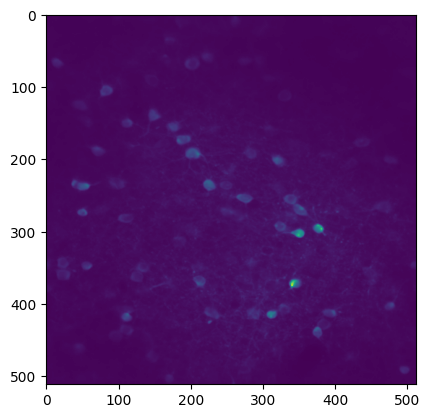

In [2]:
# example average 

eid = 1198901240
img = plt.imread(from_lims.get_average_intensity_projection_filepath(eid))

plt.imshow(img)

# One session pair example

In [3]:
# get the paired ID

eid = 1198901240
paired_id = ppr.get_paired_plane_id(eid)
paired_id

1198901242

In [5]:
# Load the shift for plane1 and plane 2

session_path = ppr.session_path_from_oeid(eid)
p1_shift = ppr.get_s2p_motion_transform(eid)
p2_shift = ppr.get_s2p_motion_transform(paired_id)

p1_shift

,framenumber,x,y,x_pre_clip,y_pre_clip,correlation,is_valid,nonrigid_x,nonrigid_y,nonrigid_corr
0,0,5,3,5,3,0.020158,True,"[-0.1, 0.8, 0.5, 0.6, 1.1, 0.3, 0.0, -0.2, 0.1...","[0.9, 0.9, 0.3, 0.8, 0.5, 0.9, 1.0, 1.0, 0.9, ...","[0.01418364,0.01211246,0.01056317,0.00845343,0..."
1,1,5,5,5,5,0.019160,True,"[-0.6, 0.1, -0.6, 0.0, 0.3, 0.5, -1.0, -0.4, 0...","[-0.3, -0.2, -0.2, 0.2, 0.3, 0.2, -0.5, -0.1, ...","[0.01419275,0.01139342,0.01259424,0.00905365,0..."
2,2,5,3,5,3,0.019804,True,"[-0.3, 0.3, 1.0, 0.4, 0.5, 0.5, -0.2, 0.1, 0.2...","[-0.3, 0.4, 2.0, 0.7, 1.2, 0.9, 0.1, 0.4, 0.9,...","[0.0162003 ,0.01145103,0.01019709,0.00825721,0..."
3,3,5,3,5,3,0.019163,True,"[0.2, 0.5, 0.9, 1.1, 2.0, 2.2, 0.6, 0.6, 0.6, ...","[0.4, 0.6, 1.5, 0.9, 0.2, 0.0, 0.3, 0.6, 0.5, ...","[0.01167538,0.01168721,0.01525104,0.00889731,0..."
4,4,4,8,4,8,0.018908,True,"[0.8, 0.3, -0.1, 2.8, 1.3, 0.8, 0.6, 0.8, 0.5,...","[1.3, 0.8, 1.4, 0.9, 0.5, 0.1, 0.5, 0.2, 0.1, ...","[0.01535993,0.01177685,0.01365481,0.00584164,0..."
...,...,...,...,...,...,...,...,...,...,...
39103,39103,-14,-26,-14,-26,0.010400,True,"[-2.3, -1.7, -2.3, -1.8, -4.5, -4.4, -2.1, -1....","[-3.1, -3.2, -5.6, -3.2, -2.3, -1.9, -2.1, -2....","[0.01265575,0.00929794,0.01052567,0.00580445,0..."
39104,39104,-14,-26,-14,-26,0.010487,True,"[0.39999998, -1.4, -2.2, -0.5, -1.5, -1.4, -0....","[-3.4, -3.9, -3.6, 0.7, -3.1, -2.9, -1.8, -3.1...","[0.01631211,0.01255084,0.01462076,0.00565713,0..."
39105,39105,-14,-26,-14,-26,0.010882,True,"[-2.4, -0.2, -1.5, -1.5, -1.7, -2.4, -1.5, -2....","[-4.7, -1.8, -2.5, -2.3, -2.1, -2.3, -1.5, -3....","[0.01446647,0.00815123,0.00937679,0.00662076,0..."
39106,39106,-14,-26,-14,-26,0.010098,True,"[-1.9, -2.0, -1.9, -2.0, -2.6, -4.8, -1.6, -1....","[-4.3, -4.0, -3.8, -3.5, -3.4, -1.4, -3.3, -2....","[0.01670172,0.00956342,0.0097438 ,0.00695194,0..."


In [26]:
# (optional) calculates the the slope of linear regression between two plane shifts
reload(ppr)
pairs = ppr.get_paired_slope_for_session(session_path)
pairs


ValueError: If using all scalar values, you must pass an index

# Many session statistics
Useful to calculate relationship between paired plane shifts across a population of experiment pairs 

In [ ]:
# example ids with obvious crosstalk, will grab all ids from the same session as each id in this list
expt_ids = [1036756388,
            1198901240,
            1218576017,
            1224381454]

# expt_ids = [ENTER YOUR SESSION IDS HERE]

paired_lm = ppr.paired_shifts_regression_for_session_oeids(expt_ids)
paired_lm

No motion correction file found for eid pair: [1036756388, 1036756390]
No motion correction file found for eid pair: [1036756391, 1036756393]
No motion correction file found for eid pair: [1036756394, 1036756396]
No motion correction file found for eid pair: [1036756397, 1036756399]


,slope_x,slope_y,intercept_x,intercept_y,ophys_experiment_id,paired_id
0,1.382144,1.262730,20.514500,31.926605,1198901234,1198901236
1,1.360349,1.308394,3.064711,5.171795,1198901237,1198901239
2,1.531427,1.256271,16.099154,27.020835,1198901240,1198901242
3,1.371942,1.325456,-0.378394,0.697520,1198901244,1198901246
4,1.235247,1.138171,-0.995520,-2.697961,1218576017,1218576021
5,1.189607,1.106441,0.013991,1.659224,1218576022,1218576025
6,1.266758,1.065841,-0.023131,0.472396,1218576026,1218576029
7,1.218352,1.104460,38.506996,47.574726,1218576030,1218576033
8,1.243075,1.152319,-5.057131,-7.887424,1224381445,1224381448
9,1.185920,1.140225,0.430214,0.617372,1224381449,1224381452


In [27]:
# example ids with obvious crosstalk
# session_ids = [ENTER YOUR SESSION IDS HERE]

session_ids = [1215022071]
paired_lm = ppr.paired_shifts_regression(session_ids)

failed for 1215022071


ValueError: No objects to concatenate

# Plotting functions (one session)

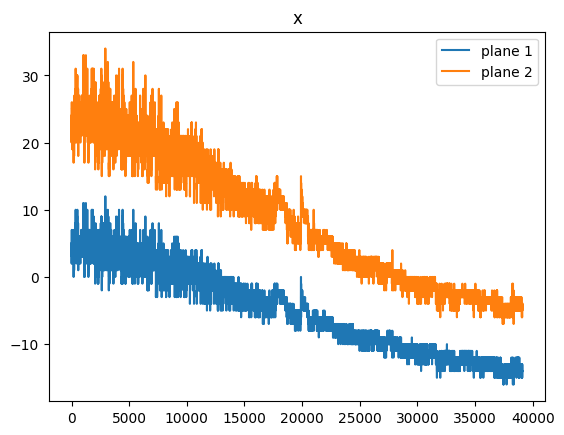

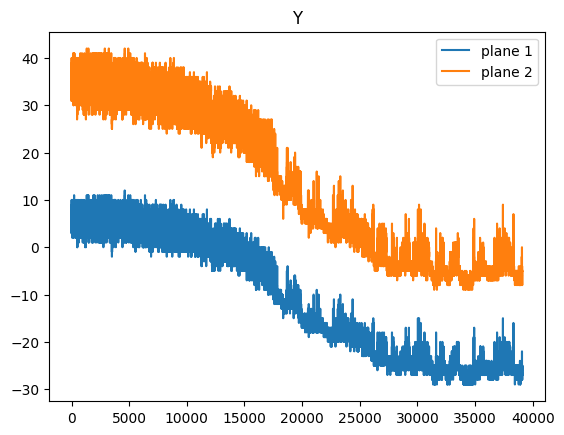

In [10]:
# plot x and y shifts for plane 1 and plane 2

fig, ax = plt.subplots()
plt.plot(p1_shift.x, label='plane 1')
plt.plot(p2_shift.x, label='plane 2')
ax.set_title('x')
# show legend
plt.legend()

fig, ax = plt.subplots()
plt.plot(p1_shift.y, label='plane 1')
plt.plot(p2_shift.y, label='plane 2')
ax.set_title('Y')
# show legend
plt.legend()


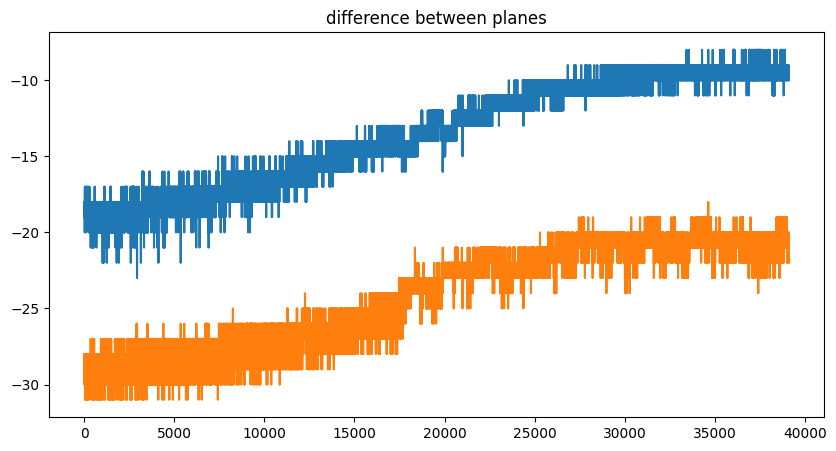

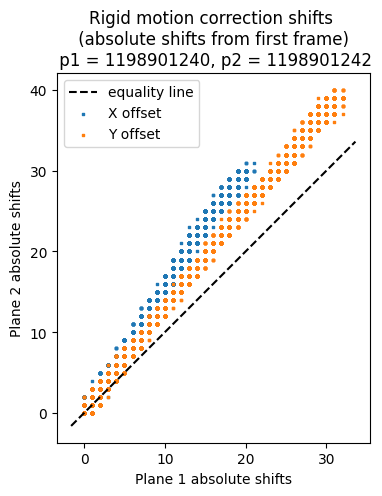

In [11]:
ppr.plot_paired_shifts(p1_shift, p2_shift ,eid, paired_id)

r-squared: 0.9947867870483073
r-squared: 0.9982104153714098


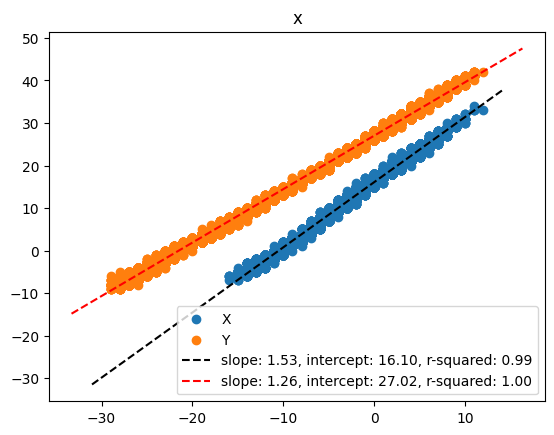

In [11]:
# not absolute shifts, deviations from 1 indicate that two planes are shifted to the same magnitude,
# despite being perfectly correlated.

ppr.plot_paired_shifts_regression(p1_shift, p2_shift)

In [13]:
# get images from original and paired shifted movies (average num_frames from start of movie)
projections_dict = ppr.paired_planes_registered_projections(eid, num_frames=1000)

<class 'numpy.int16'>
<class 'numpy.int16'>
<class 'numpy.int16'>
<class 'numpy.int16'>


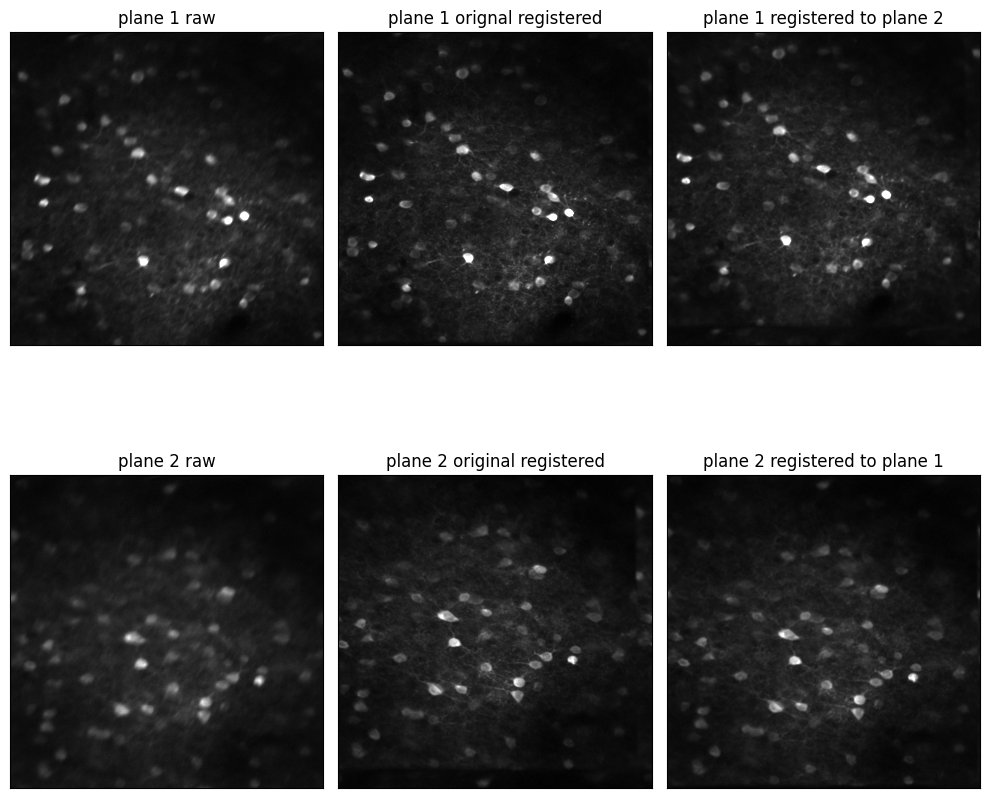

In [14]:
ppr.fig_paired_planes_registered_projections(projections_dict)

# Plotting multiple sessions

Text(0.5, 1.0, 'slope of paired planes')

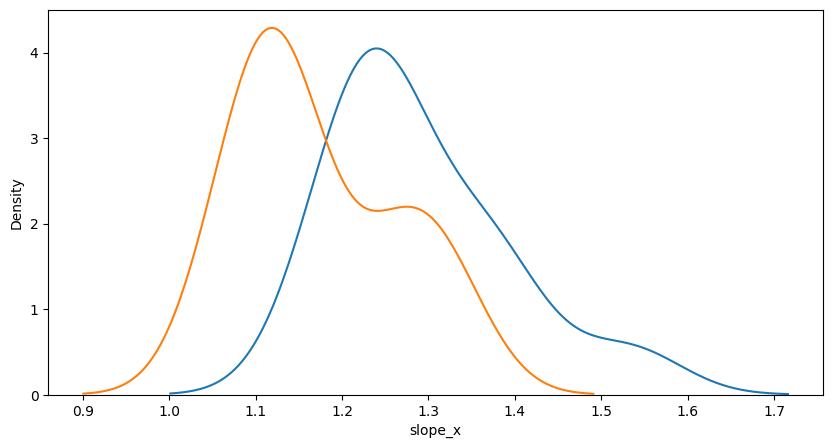

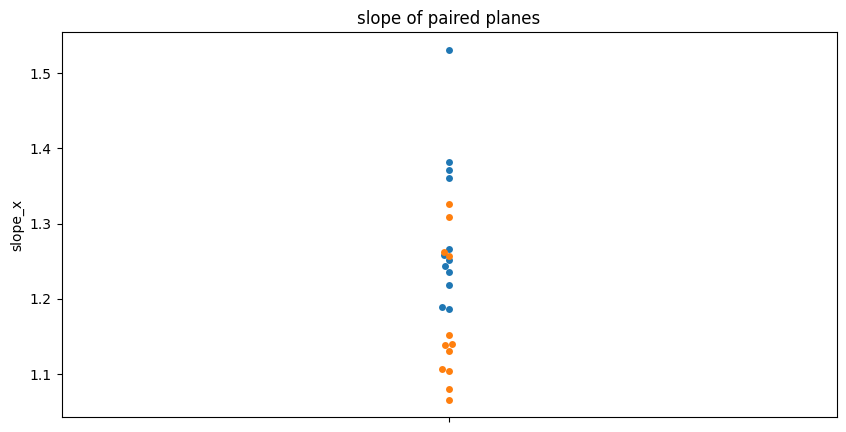

In [47]:
# kde hist of slopes
fig, ax = plt.subplots(figsize=(10, 5))
sns.kdeplot(data=paired_lm, x='slope_x', ax=ax)
sns.kdeplot(data=paired_lm, x='slope_y', ax=ax)


# swarm of slopes
fig, ax = plt.subplots(figsize=(10, 5))
sns.swarmplot(data=paired_lm, y='slope_x', ax=ax)
sns.swarmplot(data=paired_lm, y='slope_y', ax=ax)
ax.set_title('slope of paired planes')

## Shift histograms

In [15]:
eid1 = eid
eid2 = ppr.get_paired_plane_id(eid1)

expt1_shifts = ppr.get_s2p_motion_transform(eid1)
expt2_shifts = ppr.get_s2p_motion_transform(eid2)

In [16]:
e1y, e1x = expt1_shifts.y, expt1_shifts.x
e2y, e2x = expt2_shifts.y, expt2_shifts.x

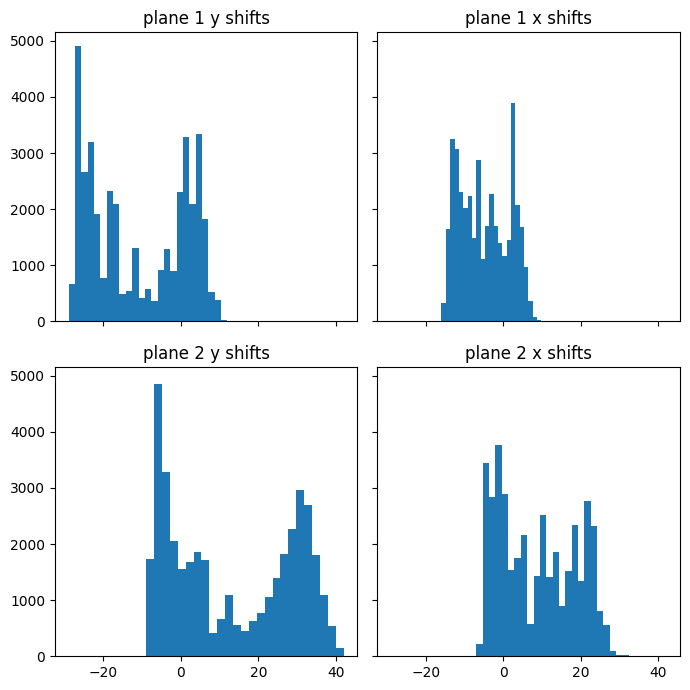

In [17]:
ppr.histogram_shifts(expt1_shifts, expt2_shifts)

Text(347.75631313131305, 0.5, 'y shift (pixels)')

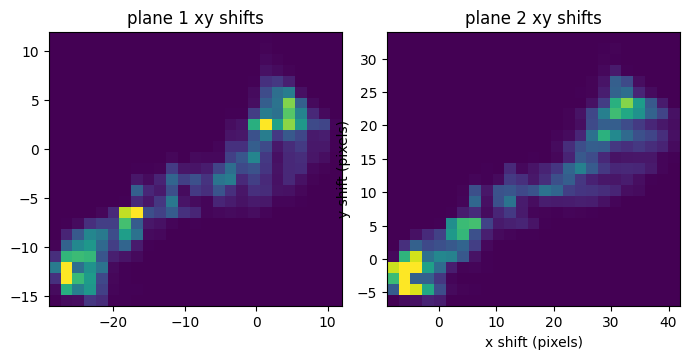

In [26]:
# %% HISTOGRAMS OF SHIFTS WITH 2D KDE

# get counts for 2d kde
counts, xedges, yedges = np.histogram2d(e1y, e1x, bins=25)
vmax = np.max(counts)/2

# make hist of diff with e1y, e1x, e2y, e2x
fig, ax = plt.subplots(1, 2, figsize=(7, 7/2))
ax[0,].hist2d(e1y, e1x, bins=25,vmax=vmax)
ax[0].set_title('plane 1 xy shifts')
ax[1].hist2d(e2y, e2x, bins=25,vmax=vmax)
ax[1].set_title('plane 2 xy shifts')
plt.tight_layout()

# x label
plt.xlabel('x shift (pixels)')
plt.ylabel('y shift (pixels)')

# Generate h5 files of original/shifted frames

In [25]:
import brain_observatory_qc.pipeline_dev.paired_plane_registration as ppr
from pathlib import Path
import os
from importlib import reload
reload(ppr)
save_path = Path(r"\\allen\programs\mindscope\workgroups\learning\pipeline_validation\decrosstalk".replace('\\', os.sep))
oeid = 1198901240
ppr.generate_all_pairings_registered_frames(oeid=oeid, save_path=save_path,
                                            shift_original= False, return_frames=False)

File already exists: \\allen\programs\mindscope\workgroups\learning\pipeline_validation\decrosstalk\1198901242_paired_registered.h5
File already exists: \\allen\programs\mindscope\workgroups\learning\pipeline_validation\decrosstalk\1198901240_paired_registered.h5
